In [11]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from skimage.filters import gabor
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [12]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [13]:
root = "/content/drive/MyDrive/Computer Vision Project 1/"

In [14]:
face_cascade = cv2.CascadeClassifier(os.path.join(root, 'haarcascade_frontalface_default.xml'))

### CelebA Dataset - 5 Classes

In [15]:
num_classes = 5

In [16]:
images = []
labels = []
for i in range(num_classes):
    label_path = os.path.join(root, f'CelebA/data/{i+1}')
    files = os.listdir(label_path)
    for file_name in files:
        img = cv2.imread(os.path.join(label_path, file_name), cv2.IMREAD_GRAYSCALE)
        faces_bound = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=5)
        if len(faces_bound) > 0:
            (x, y, w, h) = faces_bound[0]
            face = img[y:y+h, x:x+w]
            face = cv2.resize(face, (128, 128))
            images.append(face)
            labels.append(i)

In [17]:
def apply_gabor(image, frequencies = [0.1, 0.2, 0.4], thetas = [0, np.pi/4, np.pi/2, 3*np.pi/4]):
    filtered = []
    for frequency in frequencies:
        for theta in thetas:
            real, imag = gabor(image, frequency=frequency, theta=theta)
            filtered.append(real)
            filtered.append(imag)
    return np.array(filtered).reshape(-1)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [19]:
X = np.array([apply_gabor(image) for image in X_train])

In [20]:
clf = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1, probability=True))
clf.fit(X, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, kernel='linear', probability=True))])

In [21]:
pred = []
for i in range(len(X_test)):

    # Extract Gabor features for test image
    test_features = apply_gabor(X_test[i])

    # Predict the identity of the test image using the trained classifier
    probabilities = clf.predict_proba(test_features.reshape(1, -1))
    predicted_target = np.argmax(probabilities)

    pred.append(predicted_target)


In [22]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.00      0.00      0.00         2
           2       0.83      1.00      0.91         5
           3       0.80      1.00      0.89         4
           4       1.00      0.50      0.67         2

    accuracy                           0.79        19
   macro avg       0.69      0.67      0.66        19
weighted avg       0.76      0.79      0.76        19



In [23]:
accuracy_score(y_test, pred)

0.7894736842105263

True Label 3
Predicted Label 3


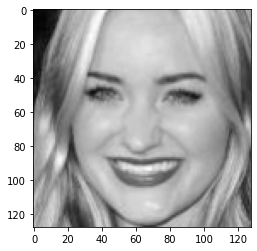

In [27]:
ind = 3
print("True Label", y_test[ind])
print("Predicted Label", pred[ind])
plt.imshow(X_test[ind], cmap="gray")
plt.show()

### CelebA Dataset - 10 classes

In [183]:
num_classes = 10

In [184]:
images = []
labels = []
for i in range(num_classes):
    label_path = os.path.join(root, f'CelebA/data/{i+1}')
    files = os.listdir(label_path)
    for file_name in files:
        img = cv2.imread(os.path.join(label_path, file_name), cv2.IMREAD_GRAYSCALE)
        faces_bound = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=5)
        if len(faces_bound) > 0:
            (x, y, w, h) = faces_bound[0]
            face = img[y:y+h, x:x+w]
            face = cv2.resize(face, (128, 128))
            images.append(face)
            labels.append(i)

In [185]:
def apply_gabor(image, frequencies = [0.1, 0.2, 0.4], thetas = [0, np.pi/4, np.pi/2, 3*np.pi/4]):
    filtered = []
    for frequency in frequencies:
        for theta in thetas:
            real, imag = gabor(image, frequency=frequency, theta=theta)
            filtered.append(real)
            filtered.append(imag)
    return np.array(filtered).reshape(-1)


In [186]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [187]:
X = np.array([apply_gabor(image) for image in X_train])

In [188]:
clf = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1, probability=True))
clf.fit(X, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, kernel='linear', probability=True))])

In [189]:
pred = []
for i in range(len(X_test)):

    # Extract Gabor features for test image
    test_features = apply_gabor(X_test[i])

    # Predict the identity of the test image using the trained classifier
    probabilities = clf.predict_proba(test_features.reshape(1, -1))
    predicted_target = np.argmax(probabilities)

    pred.append(predicted_target)


In [ ]:
print(classification_report(y_test, pred))

In [190]:
accuracy_score(y_test, pred)

0.6176470588235294

### Custom Dataset

In [162]:
num_classes = 4

In [164]:
images = []
labels = []
for i in range(num_classes):
    label_path = os.path.join(root, f'Custom Dataset/data/{i+1}')
    files = os.listdir(label_path)
    for file_name in files:
        img = cv2.imread(os.path.join(label_path, file_name), cv2.IMREAD_GRAYSCALE)
        faces_bound = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=5)
        if len(faces_bound) > 0:
            (x, y, w, h) = faces_bound[0]
            face = img[y:y+h, x:x+w]
            face = cv2.resize(face, (128, 128))
            images.append(face)
            labels.append(i)

In [165]:
def apply_gabor(image, frequencies = [0.1, 0.2, 0.4], thetas = [0, np.pi/4, np.pi/2, 3*np.pi/4]):
    filtered = []
    for frequency in frequencies:
        for theta in thetas:
            real, imag = gabor(image, frequency=frequency, theta=theta)
            filtered.append(real)
            filtered.append(imag)
    return np.array(filtered).reshape(-1)


In [166]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [167]:
X = np.array([apply_gabor(image) for image in X_train])

In [168]:
clf = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1, probability=True))
clf.fit(X, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, kernel='linear', probability=True))])

In [169]:
pred = []
for i in range(len(X_test)):

    # Extract Gabor features for test image
    test_features = apply_gabor(X_test[i])

    # Predict the identity of the test image using the trained classifier
    probabilities = clf.predict_proba(test_features.reshape(1, -1))
    predicted_target = np.argmax(probabilities)

    pred.append(predicted_target)


In [170]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         9

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



In [171]:
accuracy_score(y_test, pred)

1.0